In [1]:
import nltk
import jieba
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from wordcloud import WordCloud 
from nltk.corpus import stopwords
from gensim.models.word2vec import Word2Vec
from matplotlib.font_manager import FontProperties
font = FontProperties(fname=r"/System/Library/Fonts/STHeiti Light.ttc",size=12)
# jieba.set_dictionary('/Users/andy/Documents/python/校外課程&自我學習/jieba//dict.txt.big.txt')
# stop=stopwords.words('/Users/andy/Documents/python/校外課程&自我學習/jieba/stop_words2.txt')

In [2]:
# df_car = pd.read_excel('PTT汽車.xlsx')
# df_cchat = pd.read_excel('PTT西洽.xlsx')
# df_baseball = pd.read_excel('PTT棒球版.xlsx')
# df_gossiping = pd.read_excel('PTT八卦.xlsx')

In [7]:
# df_car.head(2)

,作者,標題,時間,內文,推文,箭頭,噓文,回文
0,WindAragon (亞拉岡),[新聞] 超跑再撞！全台限量的海神瑪莎拉蒂 北宜,Tue Dec 18 16:30:36 2018,\n\n原文連結：https://udn.com/news/story/7320/35438...,30,11,5,: 護欄家屬表示：他是孝子 : 沒害到其他孝子 了不起 給推 : 超跑家屬：一定是超跑帶壞...
1,simon87410 (),[Trash] 國產70萬級距唯一全景天窗，Luxgen U5,Tue Dec 18 12:39:52 2018,\n國產70萬級距唯一全景天窗，Luxgen U5「2019年式」全新上市！\n\n新聞來源...,54,26,20,: 我先 : XDDDD : 30萬我考慮買 : 讚！多了一個地方要修理！ : 。。。 :...


### 已經有跑好的model，可不執行

In [195]:
# 自定義字典
# jieba.load_userdict('自定義字典/car.txt')
# jieba.load_userdict('自定義字典/cchat.txt')
# jieba.load_userdict('自定義字典/baseball.txt')
# jieba.load_userdict('自定義字典/gossiping.txt')

Building prefix dict from /Users/andy/Documents/python/校外課程&自我學習/jieba/dict.txt.big.txt ...
Loading model from cache /var/folders/rc/x9l6wkn90dlgmkfy4d830zw80000gn/T/jieba.u9fe080374f2c8d462c27e757eba41adf.cache
Loading model cost 2.069 seconds.
Prefix dict has been built succesfully.


In [196]:
# # Car
# jieba_text = []
# for index in tqdm_notebook(range(len(df_car))):
#     words = jieba.cut(str(df_car['回文'][index]))
#     text, text2 = [], ''
#     for word in words:
#         if word not in stop:
#             text.append(word)
#             text2 += " "+word
#     jieba_text.append([text,text2,len(text)])
# df_car['jieba_text'] = pd.DataFrame(jieba_text)[0]
# df_car['jieba_text2'] = pd.DataFrame(jieba_text)[1]
# df_car['jieba_count'] = pd.DataFrame(jieba_text)[2]

# # C_Chat
# jieba_text = []
# for index in tqdm_notebook(range(len(df_cchat))):
#     words = jieba.cut(str(df_cchat['回文'][index]))
#     text, text2 = [], ''
#     for word in words:
#         if word not in stop:
#             text.append(word)
#             text2 += " "+word
#     jieba_text.append([text,text2,len(text)])
# df_cchat['jieba_text'] = pd.DataFrame(jieba_text)[0]
# df_cchat['jieba_text2'] = pd.DataFrame(jieba_text)[1]
# df_cchat['jieba_count'] = pd.DataFrame(jieba_text)[2]

# # Baseball
# jieba_text = []
# for index in tqdm_notebook(range(len(df_baseball))):
#     words = jieba.cut(str(df_baseball['回文'][index]))
#     text, text2 = [], ''
#     for word in words:
#         if word not in stop:
#             text.append(word)
#             text2 += " "+word
#     jieba_text.append([text,text2,len(text)])
# df_baseball['jieba_text'] = pd.DataFrame(jieba_text)[0]
# df_baseball['jieba_text2'] = pd.DataFrame(jieba_text)[1]
# df_baseball['jieba_count'] = pd.DataFrame(jieba_text)[2]

# # Gossiping
# jieba_text = []
# for index in tqdm_notebook(range(len(df_gossiping))):
#     words = jieba.cut(str(df_gossiping['回文'][index]))
#     text, text2 = [], ''
#     for word in words:
#         if word not in stop:
#             text.append(word)
#             text2 += " "+word
#     jieba_text.append([text,text2,len(text)])
# df_gossiping['jieba_text'] = pd.DataFrame(jieba_text)[0]
# df_gossiping['jieba_text2'] = pd.DataFrame(jieba_text)[1]
# df_gossiping['jieba_count'] = pd.DataFrame(jieba_text)[2]

In [197]:
# jieba有空直
# df_cchat = df_cchat.dropna()
# df_baseball = df_baseball.dropna()

## Word2Vec

In [2]:
model_car = Word2Vec.load("Word2Vec模型/car.model")
model_cchat = Word2Vec.load("Word2Vec模型/cchat.model")
model_baseball = Word2Vec.load("Word2Vec模型/baseball.model")
model_gossiping = Word2Vec.load("Word2Vec模型/gossiping.model")

In [3]:
# def most_similar(w2v_model, words, topn=10):
#     similar_df = pd.DataFrame()
#     for word in words:
#         try:
#             similar_words = pd.DataFrame(w2v_model.wv.most_similar(word, topn=topn), columns=[word, 'cos'])
#             similar_df = pd.concat([similar_df, similar_words], axis=1)
#             similar_df = similar_df.drop('cos',axis=1)
#         except:
#             print(word, "not found in Word2Vec model!")
#     return similar_df

In [198]:
# 可調參數
# model_car = Word2Vec(df_car['jieba_text'])
# model_cchat = Word2Vec(df_cchat['jieba_text'])
# model_baseball = Word2Vec(df_baseball['jieba_text'])
# model_gossiping = Word2Vec(df_gossiping['jieba_text'])

In [199]:
# model_car.save("Word2Vec模型/car.model")
# model_cchat.save("Word2Vec模型/cchat.model")
# model_baseball.save("Word2Vec模型/baseball.model")
# model_gossiping.save("Word2Vec模型/gossiping.model")

In [24]:
# 也許改成文字雲呈現
most_similar(model_car, ['新聞', '體育', '娛樂', '政治', 'XDD', '汽車', '國產車', '夜市', '明星', '女孩'])

/Users/andy/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,新聞,體育,娛樂,政治,XDD,汽車,國產車,夜市,明星,女孩
0,記者,國產汽車,VR,獻金,XDDD,機車,進口車,超商,高標準,大姐
1,報導,政權,津津樂道,黨國,XDDDD,重型,國慘車,豪門,上街,騎車去
2,爆料,趕美,TV,人物,XD,gogoro,國慘,廣場,吃香喝辣,瘦弱
3,故事,特規版,物有所值,政客,梗,二行程,國產,東區,雙雙,奮鬥
4,公社,汽車品牌,不失,民主,XDDDDD,自行車,慘車,都畫,NJ,六歲
5,睜眼,統治,嫌西,做事,好好笑,腳踏車,進口,臺中,海巡,魯到
6,假新聞,狹人,果粉,反對,幽默,界,沒撞測,忠孝東路,贓車,聯誼
7,想帶,賣來,誠懇,執政,XDDDDDDD,禁行,關稅,工地,金門,很正
8,圖說,重工業,成癮,類比,反串,不騎,產地,壯觀,理工,唸書
9,事件,本地,選了,民進黨,教主,百貨,國瑞,餐廳,K10,國中


In [25]:
most_similar(model_cchat, ['新聞', '體育', '娛樂', '政治', 'XDD', '汽車', '國產車', '夜市', '明星', '女孩'])

國產車 not found in Word2Vec model!


/Users/andy/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,新聞,體育,娛樂,政治,XDD,汽車,夜市,明星,女孩
0,對岸,沒卡過,產業,思想,XDDD,蝶,路邊攤,越南,輝夜
1,記者,怎還,電競,正確,XDDDD,復興,那家,賽揚,黑髮
2,支那,最準,消費者,用語,ww,俗稱,外食,Taiwan,明日香
3,五毛,你查,電玩,人士,wwww,卡抖,烤肉,萱,朝比奈
4,八卦,易學,競爭,審查,wwwww,台灣出,超市,日本社,葉
5,假新聞,質變,這塊,詞,XDDDDDD,版還,手搖,機甲,惠
6,用語,480,挹注,社會,XDDDDD,明星隊,便利商店,美洲,詩羽
7,盜版,有待,服務,歧視,靠北,樂高,虎穴,戲說,巫女
8,鄉民,放映,消費,法律,XD,蓋起來,逛逛,憑感覺,馴染
9,檢舉,人少,客群,迫害,三小,村雨,蛋餅,統,串燒


In [26]:
most_similar(model_baseball, ['新聞', '體育', '娛樂', '政治', 'XDD', '汽車', '國產車', '夜市', '明星', '女孩'])

/Users/andy/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,新聞,體育,娛樂,政治,XDD,汽車,國產車,夜市,明星,女孩
0,報導,對岸,大眾,人物,XDDD,房子,翻倍,逛,冒泡,客
1,寫,署,產業,政客,XDDDD,限量,破局,送機,季候,LMG
2,一篇,東南亞,族群,民主,XDDDDD,瓶,贖身,飯店,例行,Yuri
3,記者,產業,休閒,主流,XD,包包,扎,飲料,冠亞,標哥
4,報,團體,581,五毛,XDDDDDD,2980,這錢,聚餐,交流,逛
5,文章,華人,燒錢,對岸,XDDDDDDD,鐵皮屋,札金,借錢,雙重,廠商
6,篇,協會,建設,覺青,XDDDDDDDDDD,數位,調降,阿婆,短期,本體
7,消息,推廣,觀眾,國歌,哈哈哈哈,套票,很貴,富士,國際交流,員工
8,內文,護照,推廣,9.2,XDDDDDDDDD,購物中心,多花錢,麥當勞,OB,跳舞
9,新聞稿,國旗,客群,團體,好好笑,體育場,扎金,擺攤,經典,包場


In [13]:
most_similar(model_gossiping, ['新聞', '體育', '娛樂', '政治', 'XDD', '汽車', '國產車', '夜市', '明星', '女孩'])

/Users/andy/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


,新聞,體育,娛樂,政治,XDD,汽車,國產車,夜市,明星,女孩
0,報導,協會,美賣,公眾,XDDD,駕照,進口車,凱道,媚力,回憶
1,報,賽事,戲劇,人物,XDDDDD,機車,貨物稅,六合,耽誤,少女
2,媒體,名稱,很能,生涯,XDDDD,馬路,國產,寧夏,世家,動畫
3,東森,參賽權,亮點,這號,XD,加裝,裕隆,衝車,冷感,普妹
4,中天,邪會,收視,不談,XDDDDDDD,安全帽,運費,要開,素人,青春
5,記者,干涉,深刻,變色龍,XDDDDDD,禁行,高價,會開,敏感度,柯南
6,電視,CTOC,清交,零分,好好笑,abs,配備,去逛,魅力,E
7,TVBS,出賽,追星,幫派,xd,熄火,組裝,開定,世襲,熟女
8,中夭,運動選手,值低,耽誤,XDDDDDDDDD,ABS,國慘,擺攤,人物,皮膚
9,報紙,參賽,中算,素人,XDDDDDDDD,配備,iphone,鳳山,劇,制服


In [133]:
# XD, 狗, 台女, 水桶, 柯p, 約, 國際, 燈
word = "廢文"
a = model_car.wv.most_similar(word, topn=40)
b = model_cchat.wv.most_similar(word, topn=40)
c = model_baseball.wv.most_similar(word, topn=40)
d = model_gossiping.wv.most_similar(word, topn=40)
e = [a,b,c,d]

/Users/andy/anaconda/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


Input word： 廢文


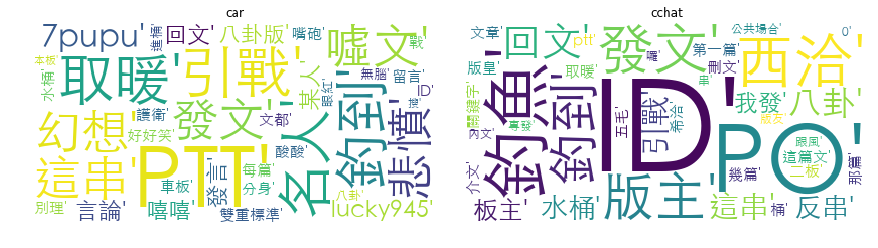

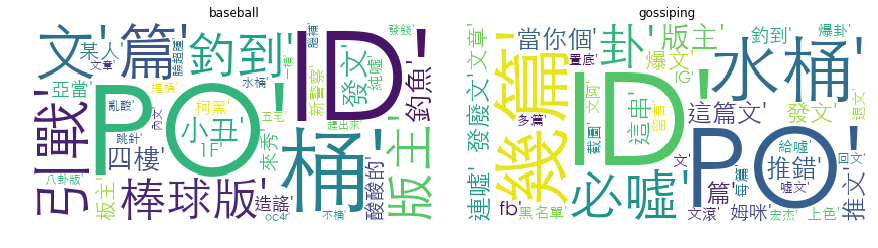

In [134]:
#文字雲
board = ['car','cchat','baseball','gossiping']
print("Input word：",word)
for i in range(-1,2,2):
    plt.subplot(221)
    wordcloud = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",).generate(str(e[i+1]))
    plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
    plt.gcf().set_size_inches(12,8)
    plt.tight_layout(pad=0)
    plt.title(board[i+1])
    plt.axis('off')

    plt.subplot(222)
    wordcloud = WordCloud(font_path=r"/System/Library/Fonts/STHeiti Light.ttc", background_color="white",).generate(str(e[i+2]))
    plt.imshow(wordcloud, interpolation="nearest", aspect="equal")
    plt.tight_layout(pad=0)
    plt.title(board[i+2])
    plt.axis('off')
    plt.show()